# gbsv Mini-Challenge 1.3 & 1.4
- Author: Sabina Gruener
- Submission date: (15 day Challenge)
- Sources:
    - Sound, "320677__aurea__cowbells-herd-of-cows-austrian-alps:": https://freesound.org/people/aUREa/sounds/320677/
    - Image, "maja-kochanowska-YslVSKPZe0E-unsplash": https://unsplash.com/de/fotos/drei-personen-die-tagsuber-auf-dem-rock-mountain-klettern-YslVSKPZe0E
    - Music, "S.T.S -Fürstenfeld": https://www.youtube.com/watch?v=FpRmP0XUVcA

In [ ]:
#!jupyter nbconvert --to html gbsv_gruener_mc1.3_1.4.ipynb

[NbConvertApp] Converting notebook gbsv_gruener_mc1.3_1.4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 80010551 bytes to gbsv_gruener_mc1.3_1.4.html


Für den letzten Abschnitt wurde ein bekanntes österreichisches Lied von der Gruppe "S.T.S" verwendet, welches 1984 nicht nur in Österreich die Charts stürmte sondern im gesamten deutschsprachigem Raum (Österreich, Deutschland, Schweiz). Auf meinen Reisen wurde mir bewusst, dass es noch weiterreichend war so traff ich bereits einen Kolumbianer welcher den Text auswendig konnte.   
Bis zur heutigen Zeit wird es in geselligen Runden gerne gespielt und lautstark mitgesungen.  

Fun Fact: Aufgrund des Rechtsrucks in der österreichischen Politik und vielen Gemeinden, kündigte der Sänger der Band an seine Heimatgemeinde, welche textlich erwähnt wird, aus den Lyrics zu streichen.   

### Libraries

In [17]:
from IPython.display import Audio, display
import scipy.io.wavfile as wav

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import resample
#from scipy.fftpack import fft


In [18]:
import warnings
from scipy.io.wavfile import WavFileWarning
# Warnungen unterdrücken (Datei enthält weitere Metadaten wie Titel, Künstler, etc)
warnings.simplefilter("ignore", WavFileWarning)

In [19]:
input_audio_path = "./data/sts_fuerstenfeld.wav"
sampling_rate, audio_data = wav.read(input_audio_path)

In [ ]:
display(Audio(filename=input_audio_path))

In [21]:
# Start- und Endzeit in Sec
start_time = 1 * 60 + 29  # 1:29 in Sec
end_time = 1 * 60 + 37    # 1:37 in Sec

start_sample = int(start_time * sampling_rate)
end_sample = int(end_time * sampling_rate)

audio_snippet = audio_data[start_sample:end_sample]


In [22]:
# Von Stereo zu Mono
if len(audio_snippet.shape) > 1:
    audio_snippet = np.mean(audio_snippet, axis=1).astype(np.int16)

display(Audio(audio_snippet, rate=sampling_rate))

## 1.3. 1D Signals: Nyquist-Shannon Sampling Theorem

#### Day 13: Nyquist-Shannon Sampling Theorem - Understanding

In Österreich gibt es ein großes kulturelles Interesse an Volksmusik und traditionellen Songs.  
Diese Musik wird digitalisiert und archiviert, um sie für zukünftige Generationen zu erhalten.  
Dabei ist die Wahl der richtigen Sampling-Rate entscheidend, um die originalgetreue Qualität der Musik zu bewahren.  


Wenn die Sampling-Rate zu niedrig gewählt wird gehen wichtige Frequenzanteile verloren.  
Es kann Aliasing auftreten, wodurch hohe Frequenzen falsch wiedergegeben werden.  
Dies führt zu hörbarem Qualitätsverlust: Der Klang wird dumpf, metallisch oder verzerrt, und feine klangliche Details gehen verloren.  

**Nyquist-Frequenz** ist die höchste Frequenz, die ein digitales System korrekt erfassen kann, ohne dass Aliasing auftritt. Sie entspricht der Hälfte der Sampling-Rate.  
**Nyquist-Rate** ist die minimale Sampling-Rate, die erforderlich ist, um ein Signal ohne Informationsverlust zu digitalisieren.  
Laut dem Nyquist-Shannon-Sampling-Theorem muss die Sampling-Rate mindestens doppelt so hoch sein wie die höchste enthaltene Frequenz (also die Nyquist-Frequenz)


zB.  
Falls in einer Musikaufnahme Frequenzen bis 15 kHz enthalten sind,  
dann muss die Sampling-Rate mindestens 30 kHz sein, um keine Informationen zu verlieren.    

Ein hoher Ton mit 10 kHz wird mit einer Sampling-Rate von 8 kHz gesampelt.  
Laut Nyquist müsste die Rate aber mind. 20 kHz sein.  
Stattdessen erscheint der Ton als falsche tiefe Frequenz -> Musik klingt „metallisch“ oder „dumpf“. 

Eine Standard-Sampling-Rate von 44.1 kHz (CD-Qualität, wie in unserem Fall) ist daher geeignet, um typische Musikinhalte mit Obertönen bis ca. 20 kHz zu erfassen.

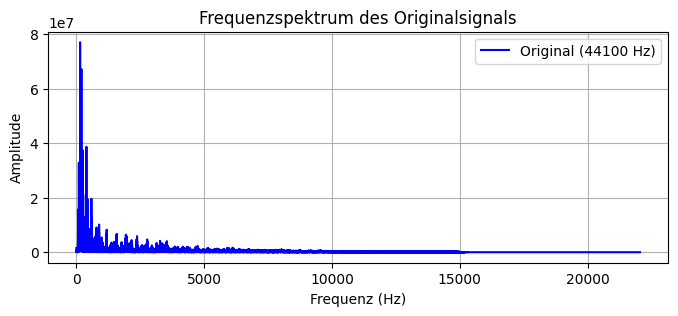

In [23]:
# FFT berechnen (nur positive Frequenzen)
N = len(audio_snippet)
fft_values = np.abs(np.fft.rfft(audio_snippet))  # Nur pos. Frequenzen
frequencies = np.fft.rfftfreq(N, 1/sampling_rate)  # Nur pos. Frequenzachse

plt.figure(figsize=(8, 3))
plt.plot(frequencies, fft_values, label=f"Original ({sampling_rate} Hz)", color='blue')
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequenzspektrum des Originalsignals")
plt.legend()
plt.grid()
plt.show()


In [24]:
threshold = 0.05 * np.max(fft_values)  # 5% Maximalwert
valid_frequencies = frequencies[fft_values > threshold]
# Höchste Frequenz über dem Schwellenwert
max_present_frequency = np.max(valid_frequencies)

print(f"Höchste signifikante Frequenz im Signal: {max_present_frequency:.2f} Hz")

Höchste signifikante Frequenz im Signal: 3541.38 Hz


Da es sich beim gewählten Audio bereits um eine digitalisierte Version handelt, können nur Rückschlüsse über den vorherigen Digitalisierungsprozess getroffen werden.
Falls wir rückwärts rechnen und annehmen, dass die Nyquist-Frequenz bei 3540 Hz lag, dann war die ursprüngliche Sampling-Rate:  

Samplingrate original = 2 × 3541.38 = 7082.76 Hz 

Das bedeutet, dass das Signal ursprünglich mit mindestens 7083 Hz gesampled wurde – möglicherweise aber auch mit einer höheren Rate, jedoch mit einem Tiefpassfilter auf etwa 3541 Hz begrenzt.
Ein Tiefpassfilter wird oft eingesetzt, um Rauschen oder unerwünschte hochfrequente Anteile zu entfernen, bevor das Signal digitalisiert wird

#### Day 14: Nyquist-Shannon Sampling Theorem - Demonstrating and Aliasing

Neue Sampling-Rate: 32000 Hz (Nyquist-Frequenz: 16000.00 Hz)
Neue Sampling-Rate: 16000 Hz (Nyquist-Frequenz: 8000.00 Hz)
Neue Sampling-Rate: 8000 Hz (Nyquist-Frequenz: 4000.00 Hz)
Neue Sampling-Rate: 6000 Hz (Nyquist-Frequenz: 3000.00 Hz)
Neue Sampling-Rate: 4000 Hz (Nyquist-Frequenz: 2000.00 Hz)
Neue Sampling-Rate: 2000 Hz (Nyquist-Frequenz: 1000.00 Hz)
Neue Sampling-Rate: 1000 Hz (Nyquist-Frequenz: 500.00 Hz)
Neue Sampling-Rate: 500 Hz (Nyquist-Frequenz: 250.00 Hz)
Neue Sampling-Rate: 100 Hz (Nyquist-Frequenz: 50.00 Hz)


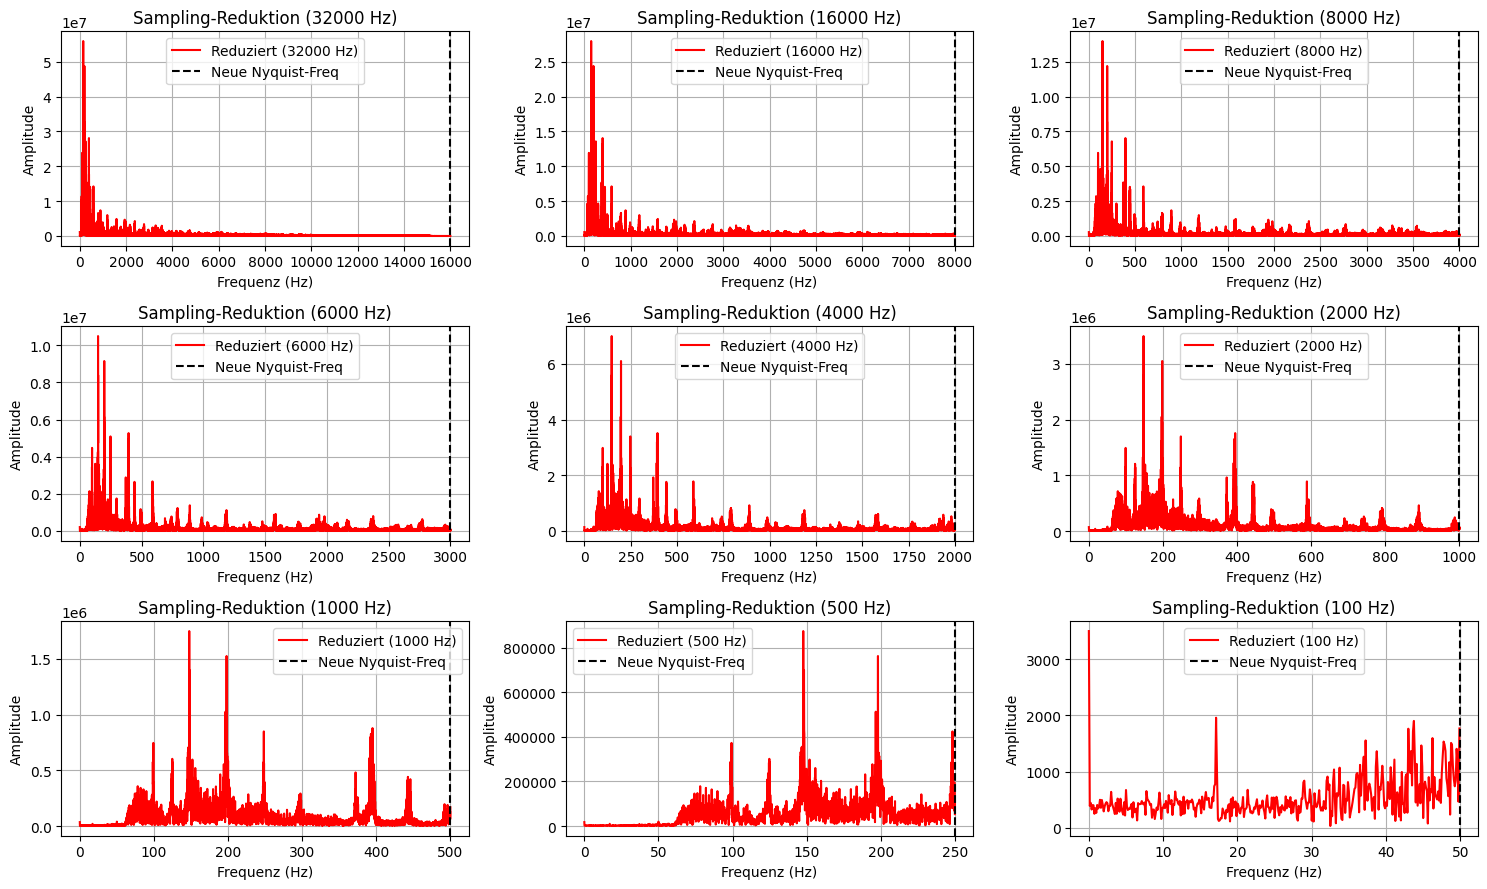

In [25]:
sampling_rates = [32000, 16000, 8000, 6000, 4000, 2000, 1000, 500, 100]

# Max. Frequenz im Original
max_freq_original = max(np.fft.rfftfreq(len(audio_snippet), 1/sampling_rate))

# Dict. zum Speichern reduzierter Samples
downsampled_audios = {}

# Anzahl der Plots pro Zeile
plots_per_row = 3
num_plots = len(sampling_rates)
rows = (num_plots // plots_per_row) + (num_plots % plots_per_row > 0)

fig, axes = plt.subplots(rows, plots_per_row, figsize=(15, 3 * rows))
axes = axes.flatten()  # Achsen-Array flach machen für einfachere Iteration

for idx, new_sr in enumerate(sampling_rates):
    # Reduziertes Signal
    num_samples = int(len(audio_snippet) * new_sr / sampling_rate)
    downsampled_audio = resample(audio_snippet, num_samples)

    downsampled_audios[new_sr] = downsampled_audio

    # Nyquist-Frequenz der neuen Sampling-Rate
    new_nyquist = new_sr / 2
    print(f"Neue Sampling-Rate: {new_sr} Hz (Nyquist-Frequenz: {new_nyquist:.2f} Hz)")

    # Frequenzspektrum nach Sampling-Reduktion
    N_new = len(downsampled_audio)
    new_frequencies = np.fft.fftfreq(N_new, 1/new_sr)
    new_fft_values = np.abs(np.fft.fft(downsampled_audio))

    # Frequenzbereich begrenzen (bis ursprüngliche Nyquist-Frequenz)
    valid_indices = np.where((new_frequencies >= 0) & (new_frequencies <= max_freq_original))
    valid_frequencies = new_frequencies[valid_indices]
    valid_fft_values = new_fft_values[valid_indices]

    ax = axes[idx]
    ax.plot(valid_frequencies, valid_fft_values, label=f"Reduziert ({new_sr} Hz)", color='red')
    ax.axvline(new_nyquist, color='black', linestyle='--', label="Neue Nyquist-Freq")
    ax.set_xlabel("Frequenz (Hz)")
    ax.set_ylabel("Amplitude")
    ax.set_title(f"Sampling-Reduktion ({new_sr} Hz)")
    ax.legend()
    ax.grid()

# Leere Plots ausblenden (falls vorhanden)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Die Plots zeigen, wie sich das Frequenzspektrum des Audios mit sinkender Sampling-Rate verändert. Bei höheren Sampling-Raten (32 kHz, 16 kHz, 8 kHz) bleiben die meisten Frequenzanteile erhalten, während ab 6 kHz zunehmend hohe Frequenzen verloren gehen, wodurch das Signal dumpfer klingt. Unter 4 kHz treten starke Verzerrungen und Aliasing auf, da Frequenzanteile falsch wiedergegeben werden. 
Wenn keine Anti-Aliasing-Maßnahmen getroffen werden, werden hohe Frequenzen, die über der neuen Nyquist Frequenz liegen, gespiegelt (gefaltet) in den Bereich unterhalb der Nyquist Grenze.
Das führt dazu, dass im Spektrum des downsampled Audios neue Peaks auftauchen, die vorher nicht da waren.  

Besonders ab 1 kHz wird der Qualitätsverlust deutlich, da kaum noch relevante Informationen erhalten bleiben.  
Die Qualität des Audios wird stark beeinträchtigt, wenn die neue Nyquist-Frequenz unterhalb der höchsten signifikanten Frequenz des Originals fällt (~3541 Hz).

Die höchste signifikante Frequenz ist in diesem Fall entscheidend (nicht die dominanteste - ist nur der lauteste Ton, meist Bass- oder Grundton), da sie angibt, wie fein das Audio im oberen Frequenzbereich aufgelöst ist. Sie ist also maßgeblich, um die technische Qualität, die Frequenzabdeckung sowie das Potenzial zur originalgetreuen Wiedergabe zu beurteilen - insbesondere im Hinblick auf die Signalbandbreite.

In diesem Fall wurde die einfachste und schnellste Methode verwendet, um eine ausreichend genaue „höchste Frequenz“ zu bestimmen - nämlich durch einen Schwellenwert bei 5% des Maximalwerts der fft-Amplituden (fft_values). Es gibt jedoch einige Möglichkeiten die exakte Frequenz zu ermitteln zB. durch Peak-Interpolation der fft-bins oder auch in Kombination mit künstlicher fft-längen Erhöhung (Zero Padding), dies würde mehr Zwischenpunkte erzeugen wodurch die Frequenzauflösung feiner wird und das Resultat genauer.

In [26]:
audio_16000Hz = downsampled_audios[16000]
display(Audio(audio_16000Hz, rate=16000))

In [27]:
audio_8000Hz = downsampled_audios[8000]
display(Audio(audio_8000Hz, rate=8000))

In [28]:
audio_6000Hz = downsampled_audios[6000]
display(Audio(audio_6000Hz, rate=6000))

In [29]:
audio_4000Hz = downsampled_audios[4000]
display(Audio(audio_4000Hz, rate=4000))

Bei 16000 merkt man ohne direkten Vergleich zum Original kaum merklich einen Unterschied.  
8000 ist weit ausgeprägter, sowie 6000  
und ab 4000 ist die klangliche Qualität der Gitarre zerstört, es klingt dumpf und hallig.  

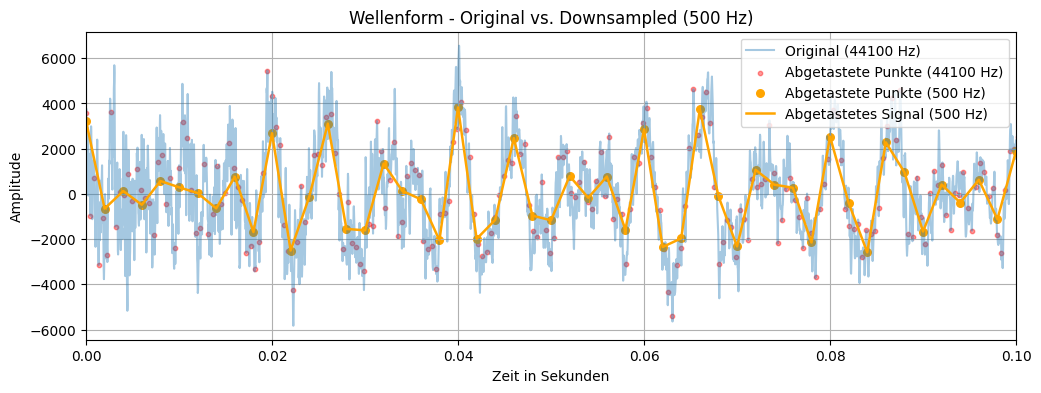

In [30]:
t_original = np.arange(len(audio_snippet)) / sampling_rate

target_sr = 500
if target_sr not in downsampled_audios:
    raise ValueError(f"Sampling-Rate {target_sr} Hz nicht in downsampled_audios vorhanden!")

downsampled_audio = downsampled_audios[target_sr]
t_downsampled = np.arange(len(downsampled_audio)) / target_sr

plt.figure(figsize=(12, 4))

# Original Audio (44100 Hz)
plt.plot(t_original[:5000], audio_snippet[:5000], label='Original (44100 Hz)', alpha=0.4)
plt.scatter(t_original[:5000:20], audio_snippet[:5000:20], color='red', s=10, alpha=0.4, label=f'Abgetastete Punkte (44100 Hz)')

# Downsampled Audio (500 Hz)
plt.scatter(t_downsampled[:100], downsampled_audio[:100], color='orange', s=30, label=f'Abgetastete Punkte (500 Hz)')
plt.plot(t_downsampled[:100], downsampled_audio[:100], color='orange', linewidth=1.8, label=f'Abgetastetes Signal (500 Hz)')

plt.title('Wellenform - Original vs. Downsampled (500 Hz)')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()
plt.show()

Das Diagramm zeigt sehr gut, wie sich das Signal durch Downsampling verändert. Mit einer so niedrigen Sampling-Rate (1 kHz) gehen viele hochfrequente Komponenten verloren, was zu einem glatteren, weniger detaillierten Signal führt, welches in den Audiobeispielen deutlich zu hören ist.  


Die Sampling Raten wurden systematisch von 32 kHz bis 100 Hz reduziert, um zu analysieren, ab welcher Rate Aliasing auftritt und wie sich das Frequenzspektrum verändert. Das SciPy Resample Verfahren wurde genutzt, um das Signal proportional zur neuen Sampling-Rate herunterzurechnen, wodurch realistische Downsampling Prozesse simuliert werden. 

Die Fast Fourier Transform (FFT) wurde zur Frequenzanalyse eingesetzt, wobei die FFT Größe N der Anzahl der Samples im resampleten Signal entspricht, was eine Frequenzauflösung von Sampling-Rate/N Hz pro Bin ergibt.

Das Spektrum wurde bis zur Nyquist-Frequenz (Sampling-Rate/2) betrachtet, um Aliasing-Artefakte sichtbar zu machen, und die Amplitude der FFT wurde normalisiert, um eine vergleichbare Skalierung für verschiedene Sampling-Raten zu gewährleisten. Zur besseren Interpretation wurde die neue Nyquist-Frequenz als gestrichelte Linie eingezeichnet, um zu zeigen, ab wann Frequenzanteile gefaltet werden und sich als neue Peaks im Spektrum ergeben.